### Do it! 실습 | 성별 직업 빈도 분석하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [4]:
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

0

In [5]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [6]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인
welfare['income'].isna().sum()

9884

In [7]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 나이 변수 만들기
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [8]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59,'middle',
                                                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

In [9]:
# 직업분류 코드 확인
list_job = pd.read_excel('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how='left', on='code_job')


### Do it! 실습 | 성별 직업 빈도 분석하기

In [15]:
# 남성 직업 빈도 상위 10개 추출
# job 결측치 제거
# male 추출
# job별 분리
# job 빈도 구하기
# 내림차순 정렬
# 상위 10행 추출
job_male = welfare.dropna(subset = ['job']).query('sex == "male"').groupby('job', as_index = False).agg(n = ('job','count')).sort_values('n', ascending = False).head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [18]:
# 여성 직업 빈도 상위 10개 추출
# 1. job 결측치 제거
# 2. female 추출
# 3. job별 분리
# 4. job 빈도 구하기
# 5. 내림차순 정렬
# 6. 상위 10행 추출
job_female = welfare.dropna(subset=['job']).query('sex == "female"').groupby('job', as_index=False).agg(n = ('job', 'count')).sort_values('n', ascending = False).head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


In [23]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

[(0.0, 500.0)]

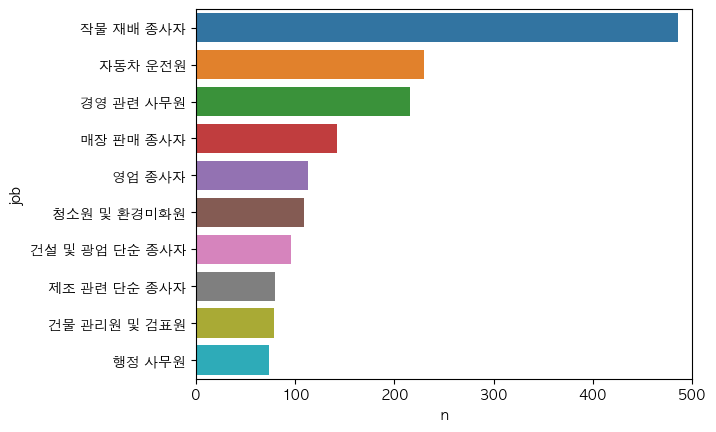

In [24]:
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n', hue='job').set(xlim = (0, 500))

[(0.0, 500.0)]

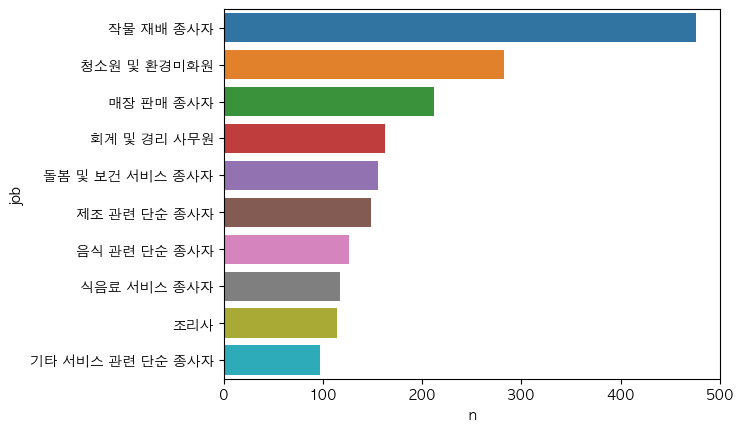

In [25]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n', hue='job').set(xlim = (0, 500))